# IMDB Positive-Negative Classification

## Preparation

### Load the Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

tf.__version__

'2.7.4'

### Prepare Training Data

In [2]:
train_ds, test_ds = tf.keras.datasets.imdb.load_data(num_words=10000)
train_ds[0].shape

(25000,)

In [3]:
type(train_ds[0])

numpy.ndarray

In [4]:
train_ds[1][1], len(train_ds[0][1])

(0, 189)

In [5]:
max([len(x) for x in train_ds[0]])

2494

In [6]:
# The largest number of dictionary sequences in each sentence
# Estimated: 9999 = Top 10000(0~9999) extractions of maximum frequency
max([max(x) for x in train_ds[0]])  

9999

In [60]:
len(word_index)

88584

#### Convert Numbers to Text for Fun

In [7]:
word_index = tf.keras.datasets.imdb.get_word_index()
type(word_index), len(word_index), word_index["0"]   # word_index = {"abc": 1235, "exfs": 67896, ...}

(dict, 88584, 2238)

In [8]:
# (key, value) -> (value, key)
# 0: padding(<PAD>), 1: start of document(<START>), 2: out of vocabulary(<OOV>), 3: invalid(<INV>)
reverse_word_index = dict([(value+3, key) for (key, value) in word_index.items()])
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<OOV>"
reverse_word_index[3] = "<INV"

In [9]:
decode_review = ' '.join([reverse_word_index.get(i,"?") for i in train_ds[0][1]])
decode_review

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <OOV> the hair is big lots of boobs <OOV> men wear those cut <OOV> shirts that show off their <OOV> sickening that men actually wore them and the music is just <OOV> trash that plays over and over again in almost every scene there is trashy music boobs and <OOV> taking away bodies and the gym still doesn't close for <OOV> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

### Convert a sentence to a number of the same length

* 인덱스가 올 수 있는 최대 크기인 10000개로 구성된 One-Hot Encoding 구현
* 문제점은 한 문장에 같은 인덱스가 여러번 올 수 있는데(예 한 문장에 'the'가 여러번 올 경우) 이 경우 한번만 표현 됨

In [10]:
def vectorize_sentences(setences, dims=10000):
    results = np.zeros((len(setences), dims))
    for idx, setence in enumerate(setences):
        results[idx, setence] = 1.
    return results

train_x = vectorize_sentences(train_ds[0])
test_x = vectorize_sentences(test_ds[0])

In [11]:
train_y = np.array(train_ds[1]).astype("float32")
test_y = np.array(test_ds[1]).astype("float32")

## Define & Training Model

### Two Dense & Relu

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

2022-10-09 23:22:31.331395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 23:22:31.383543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 23:22:31.383769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 23:22:31.384506: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

#### Training

In [13]:
history = model.fit(train_x, train_y, epochs=20, batch_size=512, validation_split=.4)

2022-10-09 23:22:32.113178: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.
2022-10-09 23:22:32.529726: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5455 - accuracy: 0.7715 - val_loss: 0.3856 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2919 - accuracy: 0.9055 - val_loss: 0.2936 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1994 - accuracy: 0.9340 - val_loss: 0.2770 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1484 - accuracy: 0.9544 - val_loss: 0.2837 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1138 - accuracy: 0.9677 - val_loss: 0.2990 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0872 - accuracy: 0.9780 - val_loss: 0.3191 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0661 - accuracy: 0.9857 - val_loss: 0.3450 - val_accuracy: 0.8802
Epoch 8/20
30

#### Evaluation

In [54]:
model.evaluate(test_x, test_y)

2022-10-10 00:05:08.862317: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.
2022-10-10 00:05:09.656805: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.8542


[0.7018916606903076, 0.8542400002479553]

### Three Dense & Relu

In [55]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
history3 = model3.fit(train_x, train_y, epochs=20, batch_size=512, validation_split=.4)
model3.evaluate(test_x, test_y)

2022-10-10 00:07:19.933072: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5445 - accuracy: 0.7660 - val_loss: 0.3626 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2622 - accuracy: 0.9079 - val_loss: 0.2791 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1642 - accuracy: 0.9446 - val_loss: 0.2888 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1137 - accuracy: 0.9656 - val_loss: 0.3135 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0782 - accuracy: 0.9787 - val_loss: 0.3589 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0527 - accuracy: 0.9884 - val_loss: 0.4095 - val_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.9930 - val_loss: 0.4717 - val_accuracy: 0.8732
Epoch 8/20
30

[0.9542952179908752, 0.8507999777793884]

### Units=64, 128, Four Dense

In [59]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])
model4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history4 = model4.fit(train_x, train_y, epochs=20, batch_size=512, validation_split=.4)
model4.evaluate(test_x, test_y)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5132 - accuracy: 0.7467 - val_loss: 0.3081 - val_accuracy: 0.8771
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2117 - accuracy: 0.9227 - val_loss: 0.3064 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1132 - accuracy: 0.9627 - val_loss: 0.3761 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0617 - accuracy: 0.9827 - val_loss: 0.4855 - val_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0352 - accuracy: 0.9917 - val_loss: 0.5806 - val_accuracy: 0.8716
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0186 - accuracy: 0.9961 - val_loss: 0.6945 - val_accuracy: 0.8699
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0102 - accuracy: 0.9984 - val_loss: 0.7567 - val_accuracy: 0.8674
Epoch 8/20
30

[1.5852999687194824, 0.8524799942970276]

### Embedding

In [13]:
train_ex = tf.keras.preprocessing.sequence.pad_sequences(train_ds[0], 800)  # padding="pre" - default
test_ex = tf.keras.preprocessing.sequence.pad_sequences(test_ds[0], 800)
train_ey, test_ey = np.expand_dims(train_ds[1], axis=-1), np.expand_dims(test_ds[1], axis=-1)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=32),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit(train_ex, train_ey, epochs=50, batch_size=512, validation_split=.2)

Epoch 1/50
40/40 [==============================] - 2s 32ms/step - loss: 0.6929 - accuracy: 0.5092 - val_loss: 0.6936 - val_accuracy: 0.5004
Epoch 2/50
40/40 [==============================] - 1s 29ms/step - loss: 0.6923 - accuracy: 0.5100 - val_loss: 0.6917 - val_accuracy: 0.5134
Epoch 3/50
40/40 [==============================] - 1s 28ms/step - loss: 0.6913 - accuracy: 0.5096 - val_loss: 0.6912 - val_accuracy: 0.5138
Epoch 4/50
40/40 [==============================] - 1s 29ms/step - loss: 0.6910 - accuracy: 0.5083 - val_loss: 0.6910 - val_accuracy: 0.5140
Epoch 5/50
40/40 [==============================] - 1s 29ms/step - loss: 0.6910 - accuracy: 0.5096 - val_loss: 0.6910 - val_accuracy: 0.5142
Epoch 6/50
40/40 [==============================] - 1s 28ms/step - loss: 0.6910 - accuracy: 0.5106 - val_loss: 0.6910 - val_accuracy: 0.5141
Epoch 7/50
40/40 [==============================] - 1s 28ms/step - loss: 0.6909 - accuracy: 0.5136 - val_loss: 0.6910 - val_accuracy: 0.5139
Epoch 8/50
40

## Display Results

### Plot Training and Validation Loss/Accuracy Graphs

In [52]:
def display_history(history, model_name):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    accuracy = history_dict["accuracy"]
    val_accuracy = history_dict["val_accuracy"]
    epochs = range(1, len(loss)+1)

    # fig, axs = plt.subplots(1, 2, figsize=(10,4))
    fig, axs = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={"width_ratios": [2,1]})
    fig.suptitle(model_name, size=25)
    fig.subplots_adjust(top=.75)
    axs[0].plot(epochs, loss, "b", label="Training")
    axs[0].plot(epochs, val_loss, "r", label="Validation")
    axs[0].set_title("Loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    axs[1].plot(epochs, accuracy, "b", label="Training")
    axs[1].plot(epochs, val_accuracy, "r", label="Validation")
    axs[1].set_title("Accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

    plt.show()

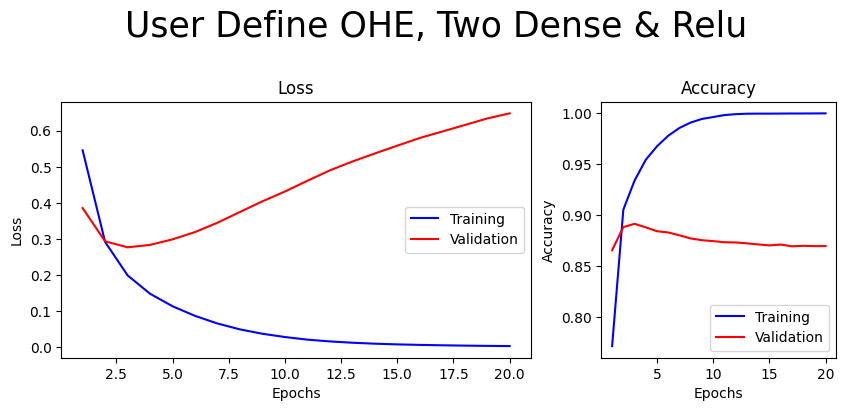

In [53]:
display_history(history, "User Define OHE, Two Dense & Relu")

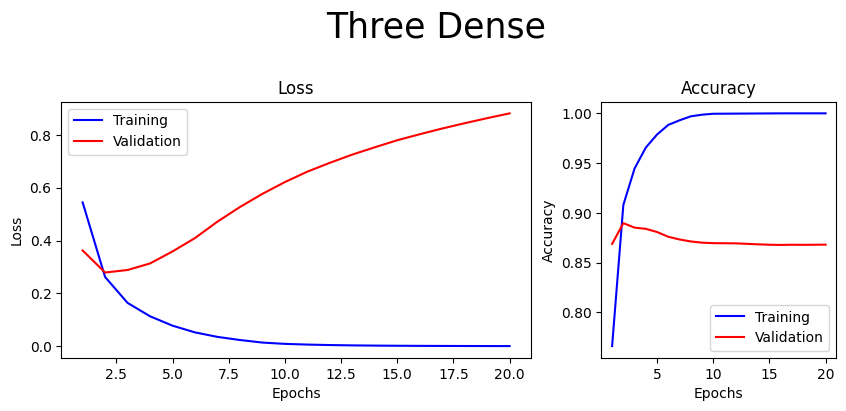

In [57]:
display_history(history3, "Three Dense")